In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Atmosphere volume

Volume atmosfer di Mars dianggap konstan dan dapat dicari dengan mengurangi volume planet dengan atmosfer terluar.
$$V_{\text{atmosfer}} = \frac{4}{3}\pi [(r+h)^3 - r^3]$$  

Atmosfer dari Mars berada di 230 km sebelum mulai ke eksosfer, radius Mars sepanjang 3,389.5 km.

In [16]:
r_mars = 3389.5   # km
h_atm_mars = 230  # km
v_atm = 4/3*np.pi*((r_mars + h_atm_mars)**3 - r_mars**3)
a_atm = 4*np.pi*(r_mars + h_atm_mars)**2

print("Volume atmosfer Mars:", v_atm, "km^3")
print("Surface area mulai eksosfer Mars:", a_atm, "km^2 :", a_atm*1e6, "m^2")
print("1/2 surface area mulai eksosfer Mars:", a_atm/2, "km^2 :", a_atm*1e6/2, "m^2")
print("Solar wind energy flux in mars:", a_atm*1e6/2 * 7.4e-4, "W")

swe_flux_mars = a_atm*1e6/2 * 7.4e-4

Volume atmosfer Mars: 35509592341.534546 km^3
Surface area mulai eksosfer Mars: 164629259.958777 km^2 : 164629259958777.0 m^2
1/2 surface area mulai eksosfer Mars: 82314629.9793885 km^2 : 82314629979388.5 m^2
Solar wind energy flux in mars: 60912826184.74749 W


## Escaping Mars

Thermal velocity dari gas dapat dihitung menggunakan persamaan

$$v_{\text{thermal}} = \sqrt{\frac{2k_\text{B}T}{m_{\text{gas}}}}$$

Escape velocity dari Mars dapat dihitung menggunakan persamaan

$$v_{\text{escape}} = \sqrt{\frac{2GM_{\text{planet}}}{R_{\text{planet}}}}$$

Source: https://astronomy.stackexchange.com/questions/18685/how-does-the-solar-wind-destroy-the-atmosphere-of-a-planet-lacking-a-magnetic-fi

In [26]:
G = 6.67e-11
m_mars = 0.64e24
v_esc_mars = np.sqrt(2*G*m_mars/r_mars)

k_b = 1.38e-23
mr_co2 = 44
mr_h2o = 18
co2_mass = mr_co2 * 1/6.023e23 * 1e-3
h2o_mass = mr_h2o * 1/6.023e23 * 1e-3
T_mars_surf = 227
T_mars_ther = 240

e_esc_mars = 1/2*co2_mass*v_esc_mars**2
e_esc_mars_h2o = 1/2*h2o_mass*v_esc_mars**2

print("Escape velocity dari Mars:", v_esc_mars, "m/s")
print("Escape energy dari Mars CO2:", e_esc_mars, "J")
print("Escape energy dari Mars H2O:", e_esc_mars_h2o, "J")

print()

v_ther = np.sqrt(2*k_b*T_mars_ther/co2_mass)
e_ther = 1/2*co2_mass*(2*k_b*T_mars_ther/co2_mass)

print("Thermal velocity CO2 di thermosfer", v_ther, "m/s")
print("Thermal energy CO2 di thermosfer", 1/2*co2_mass*v_ther**2, "m/s")

print()

nps_co2_esc = swe_flux_mars/2/e_esc_mars # n per second
nps_h2o_esc = swe_flux_mars/2/e_esc_mars_h2o # n per second
mass_loss_rate = nps_co2_esc * co2_mass
mass_loss_rate_h2o = nps_h2o_esc * h2o_mass
mass_loss_rate_half = nps_co2_half_esc * co2_mass

print("CO2 escape:", nps_co2_esc, "CO2/s")
print("H2O escape:", nps_h2o_esc, "H2O/s")

print()

print("Mass loss rate CO2:", mass_loss_rate, "kg/s")
print("Mass loss rate H2O:", mass_loss_rate_h2o, "kg/s")

Escape velocity dari Mars: 158708.46186214205 m/s
Escape energy dari Mars CO2: 9.200469351921535e-16 J
Escape energy dari Mars H2O: 3.7638283712406276e-16 J

Thermal velocity CO2 di thermosfer 301.1204530959783 m/s
Thermal energy CO2 di thermosfer 3.3120000000000005e-21 m/s

CO2 escape: 3.310310803438834e+25 CO2/s
H2O escape: 8.091870852850484e+25 H2O/s

Mass loss rate CO2: 2.4182911398191718 kg/s
Mass loss rate H2O: 2.4182911398191718 kg/s


In [23]:
4.9e10 * a_atm

8.066833737980074e+18

In [24]:
3.2e6 * 0.92e15 #kg of water

2.944e+21

## Change in pressure over time

Perubahan tekanan terhadap waktu dapat dideskripsikan menggunakan persamaan gas ideal yang di mana volume dan suhunya konstan

$$P(t) = n(t) \frac{RT}{V}$$

Mengubah $n$ menjadi massa dan massa molar

$$P(t) = \frac{m(t)}{m_r} \frac{RT}{V}$$

$$P(t) = m(t) \frac{RT}{V m_r}$$

Mencari perubahan tekanan terhadap waktu

$$\Delta P =  \dot m t \frac{RT}{V m_r}$$



      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 34067.06130772186


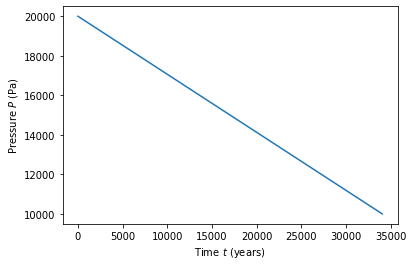

In [29]:
R = 8.314
T = 210 # K
V = v_atm

def delta_p(t):
  return (mass_loss_rate_h2o/mr_h2o + mass_loss_rate/mr_co2)*R*T/(V)*t*365*24*60*60

reduced = 0.1e5 # pascal

def delta_p_mod(t):
  return (mass_loss_rate_h2o/mr_h2o + mass_loss_rate/mr_co2)*R*T/(V)*t*365*24*60*60 - reduced

def pressure_over_time(t):
  return 0.2e5 - delta_p(t)

sol = optimize.root_scalar(delta_p_mod, x0=1e2, x1=1e3, method="secant")
print(sol)

t = np.linspace(0, sol.root, 100)
pressures = pressure_over_time(t)

plt.plot(t, pressures)
plt.xlabel("Time $t$ (years)")
plt.ylabel("Pressure $P$ (Pa)")
plt.show()

## Carbon Dioxide

In [18]:
from scipy import optimize

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 1850250233744.9902


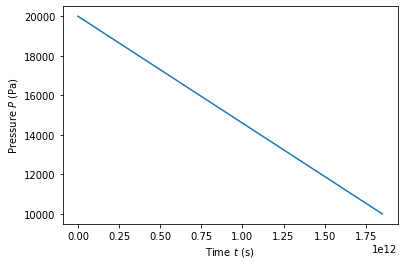

In [19]:
R = 8.314
T = 210 # K
V = v_atm
mr = 44

def delta_p(t):
  return (mass_loss_rate*t)*R*T/(V*mr)

reduced = 0.1e5 # pascal

def delta_p_mod(t):
  return (mass_loss_rate*t)*R*T/(V*mr) - reduced

def pressure_over_time(t):
  return 0.2e5 - delta_p(t)

sol = optimize.root_scalar(delta_p_mod, x0=1e2, x1=1e3, method="secant")
print(sol)

t = np.linspace(0, sol.root, 100)
pressures = pressure_over_time(t)

plt.plot(t, pressures)
plt.xlabel("Time $t$ (s)")
plt.ylabel("Pressure $P$ (Pa)")
plt.show()

In terms of years

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 58671.05002996545


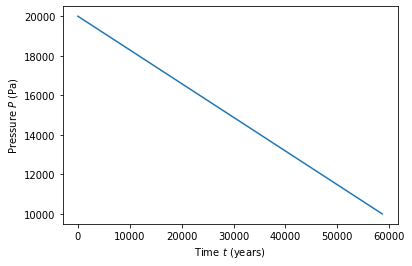

In [20]:
m_awal = 3.2e6 * 1.7e-3/1e-15
R = 8.314
T = 210 # K
V = v_atm
mr = 44

def delta_p(t):
  return (mass_loss_rate*t*365*24*60*60)*R*T/(V*mr)

reduced = 0.1e5 # pascal

def delta_p_mod(t):
  return (mass_loss_rate*t*365*24*60*60)*R*T/(V*mr) - reduced

def pressure_over_time(t):
  return 0.2e5 - delta_p(t)

sol = optimize.root_scalar(delta_p_mod, x0=1e2, x1=1e3, method="secant")
print(sol)

t = np.linspace(0, sol.root, 100)
pressures = pressure_over_time(t)

plt.plot(t, pressures)
plt.xlabel("Time $t$ (years)")
plt.ylabel("Pressure $P$ (Pa)")
plt.show()

## Water

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 756920550168.4052


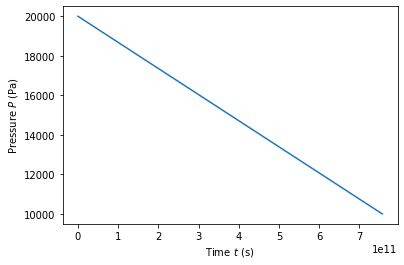

In [21]:
R = 8.314
T = 210 # K
V = v_atm

def delta_p(t):
  return (mass_loss_rate_h2o*t)*R*T/(V*mr_h2o)

reduced = 0.1e5 # pascal

def delta_p_mod(t):
  return (mass_loss_rate_h2o*t)*R*T/(V*mr_h2o) - reduced

def pressure_over_time(t):
  return 0.2e5 - delta_p(t)

sol = optimize.root_scalar(delta_p_mod, x0=1e2, x1=1e3, method="secant")
print(sol)

t = np.linspace(0, sol.root, 100)
pressures = pressure_over_time(t)

plt.plot(t, pressures)
plt.xlabel("Time $t$ (s)")
plt.ylabel("Pressure $P$ (Pa)")
plt.show()

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 24001.79319407677


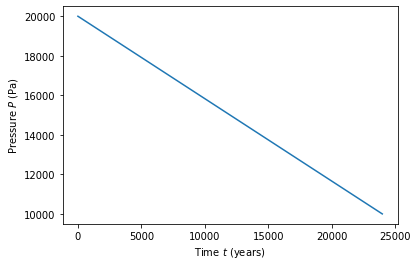

In [22]:
R = 8.314
T = 210 # K
V = v_atm

def delta_p(t):
  return (mass_loss_rate_h2o*t*365*24*60*60)*R*T/(V*mr_h2o)

reduced = 0.1e5 # pascal

def delta_p_mod(t):
  return (mass_loss_rate_h2o*t*365*24*60*60)*R*T/(V*mr_h2o) - reduced

def pressure_over_time(t):
  return 0.2e5 - delta_p(t)

sol = optimize.root_scalar(delta_p_mod, x0=1e2, x1=1e3, method="secant")
print(sol)

t = np.linspace(0, sol.root, 100)
pressures = pressure_over_time(t)

plt.plot(t, pressures)
plt.xlabel("Time $t$ (years)")
plt.ylabel("Pressure $P$ (Pa)")
plt.show()